In [ ]:
!pip install essential-generators
import random
from essential_generators import DocumentGenerator
import pandas as pd
gen = DocumentGenerator()
def gen_rating():
  return random.randrange(5000)
def gen_age():
  return random.randrange(10, 80)
template = {'id': 'guid',
'status': ['online', 'offline', 'anonymous'],
'gender': ['male', 'female'],
'email': 'email',
'age': gen_age,
'messages': gen_rating,
'likes': gen_rating,
'retweets': gen_rating,
'name': 'name',
'twitter post': 'sentence',
}
gen.set_template(template)
documents = gen.documents(50000)
df = pd.DataFrame(documents)
df = df.set_index('id')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.2 MB/s 


# **Starting exploring the Dataset**

In [ ]:
#importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from IPython.display import HTML
import plotly.io as pio
pio.renders

In [ ]:
df.head() #starting to explore the dataset

,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
eafe22bf-f436-49d2-8790-176aa156a690,online,male,of@Wided.ru,73,3538,3318,2511,And Eut,"Hat or Nordic Classicism, which enjoyed brief ..."
32b8ce60-157d-4749-b8ac-0412b453025c,offline,male,ammay@a.edu,25,3301,2446,3880,This In,"Is Brazil's giganteum), among the population."
9f082b66-c00c-4695-b1bc-dd2fef03e1c9,offline,male,a@wrimar.com,22,4126,4312,113,Ch The,Examples might today's huge lake freighters us...
da10e39e-73e3-4d56-8a22-f96f8c25899c,offline,female,of@Ybonot.sepach.com,49,4462,2775,1981,Poster By,"Melting occurs comics, and animation."
ddd99be7-76dd-46ec-8e2d-d4775340f5a9,anonymous,male,infoli220@Scin.re.com,71,4713,1187,380,Ned Yed,"Seas. Consequently, mountainous parts of the B..."


In [ ]:
df.describe()

,age,messages,likes,retweets
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.574760,2499.112600,2494.293900,2504.864340
std,20.196071,1443.248701,1440.661618,1445.464188
min,10.000000,0.000000,0.000000,0.000000
25%,27.000000,1240.000000,1246.000000,1257.000000
50%,45.000000,2505.000000,2494.000000,2507.000000
75%,62.000000,3757.000000,3731.000000,3756.000000
max,79.000000,4999.000000,4999.000000,4999.000000


In [ ]:
#exporting to excel for easier formatting in powerpoint
df1 = df.head(3)
df1.to_excel("output.xlsx") 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, eafe22bf-f436-49d2-8790-176aa156a690 to 6a0169eb-996d-4736-8917-d55f3c40b81c
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status        50000 non-null  object
 1   gender        50000 non-null  object
 2   email         50000 non-null  object
 3   age           50000 non-null  int64 
 4   messages      50000 non-null  int64 
 5   likes         50000 non-null  int64 
 6   retweets      50000 non-null  int64 
 7   name          50000 non-null  object
 8   twitter post  50000 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.8+ MB


In [ ]:
df.columns

Index(['status', 'gender', 'email', 'age', 'messages', 'likes', 'retweets',
       'name', 'twitter post'],
      dtype='object')

In [ ]:
df.index

Index(['eafe22bf-f436-49d2-8790-176aa156a690',
       '32b8ce60-157d-4749-b8ac-0412b453025c',
       '9f082b66-c00c-4695-b1bc-dd2fef03e1c9',
       'da10e39e-73e3-4d56-8a22-f96f8c25899c',
       'ddd99be7-76dd-46ec-8e2d-d4775340f5a9',
       '1af66333-5609-482d-83bb-8a0c63a70529',
       '13d3bae2-578b-4c2e-aed2-feae19a650d5',
       'eebe6d22-d500-4be8-a07d-ea951ccb7b3a',
       'bc7c1f89-0cdb-4f22-941e-68b7c25b7f94',
       '3ca7415c-7401-442e-bc70-d99f3eff333b',
       ...
       'ac32d082-b3ac-4da6-afd1-55ff8502924f',
       '0a914a5e-77f6-4742-8089-2449c2775d06',
       '93920a20-8c69-4062-87ba-acdd19205124',
       '054b2001-0ab5-4668-a1fd-52cdd26e321a',
       'e6f1ebe4-d912-443f-ac9e-1e214c321c83',
       '30a6f9b3-1b59-4c7f-98e7-9be5d9cbd473',
       'aa0ab059-5657-4397-aa72-a2b109f0f8b5',
       'eb684bed-37ad-43c7-a98f-7d211c3a86f5',
       'd011e049-be92-42aa-9573-a00ddf8e0b73',
       '6a0169eb-996d-4736-8917-d55f3c40b81c'],
      dtype='object', name='id', length=50000)

In [ ]:
df.sort_values(['age', 'gender'], ascending = False).head() 

,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
4eb3baad-9e9b-4cb6-a2e0-1418f10798dc,offline,male,knosit@Khaves.biz,79,4557,2995,1367,Colon Han,"Worldwide population exhibits, rides, educatio..."
75b1851f-7e3a-4a4c-b2d7-064c98e2cdd6,online,male,fring@only.com,79,1020,4846,2306,Hats Tiecit,"Washington, nicknamed cause. ISIS produces"
b9a85a12-65bd-429c-83c8-54c67ddf0875,online,male,thard.clatia@or.com,79,2616,792,2166,Sulers In,Physical Society City—departed in
4e0a815c-67a1-4b4d-9d1f-9c82fe9a295c,anonymous,male,de@ons.fr,79,3361,4006,3422,Nes Whishr,"Reasons. ""Herodotus place by cell"
7942778b-b738-4978-b465-2bc9affe1980,offline,male,by@renspe.edu,79,2233,2545,2828,As Theigh,Systems. Computational are run by a


# **Findinding insights on most retweeted posts per age group**

In [ ]:
df['retweets'].describe() #collecting general statistical information on data-point

count    50000.000000
mean      2504.864340
std       1445.464188
min          0.000000
25%       1257.000000
50%       2507.000000
75%       3756.000000
max       4999.000000
Name: retweets, dtype: float64

In [ ]:
df['likes'].describe()

count    50000.000000
mean      2494.293900
std       1440.661618
min          0.000000
25%       1246.000000
50%       2494.000000
75%       3731.000000
max       4999.000000
Name: likes, dtype: float64

In [ ]:
interest_group = df[(df['retweets'] < 4999) & (df['retweets'] > 3737)] #creating sub-dataset (top 25% of most retweeted posts) 
interest_group.sort_values('age', ascending = False).head()


,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
71e28704-1cff-40fe-9ef5-ea261b2f3860,offline,male,ines.praliz@of.com,79,4057,1998,3772,Tecito Id,Inhabitants as warm-water South Atlantic Gyre....
6e2d751f-072d-4c60-a2b0-248d8d9bae26,online,female,tho215@nated.com,79,220,2899,4226,Theand Sm,"Bahamas also and Peter W. Williams, eds. Encyc..."
8bab7c73-b545-4d79-95ae-d4042bdd2204,online,male,haver.Wabsoc@a.com,79,2919,3565,4873,Th As,"Well known. canals, Lake Union."
bcddfdb6-9b99-4c0f-a3aa-98154515cf77,anonymous,male,eve@conge.com,79,4844,3424,4558,Pishin Lifaxa,"Two rightmost and Toronto Blue Jays, one profe..."
1efff366-76a9-42cf-a712-7f057f73b79c,online,female,Chated.Capple@fecion.org,79,1796,869,3743,A Broved,The Duchy motivated to portray themselves in d...


In [ ]:
interest_group2 = interest_group[(interest_group['likes']>3760) & (interest_group['likes']<5000)]
interest_group2.sort_values('age', ascending = False).head()

,status,gender,email,age,messages,likes,retweets,name,twitter post
id,,,,,,,,,
6dcca36f-9805-4465-99a2-9e6a8af90cea,offline,male,malter@molaci.edu,79,2604,4412,3995,Buther Searti,Major art climates over time.
ae3a6d02-d6bb-4a68-a10d-cf334b6031e6,online,male,affeed.orch@Jostab.so.com,79,443,4041,4898,And Re,Than international badlands regions in Califor...
896cdbc5-875e-4960-9662-893389ef18a6,online,female,nedian@Wyout793.edu,79,4737,4944,4176,In The,"Then sell known cat, Creme Puff, dying at a la..."
b20f3420-09d2-46b9-aca3-8187850c5ffd,online,male,on@thate.jp,79,91,3793,3904,Pect Of,"Important, as relationships which we foster"
14bc7024-c437-481c-8e7b-5bfcf08fef72,online,female,of.usek@astic.com,79,3899,4311,4578,Egy Tampan,"France, 94% received two: ""Our Great Virginia""..."


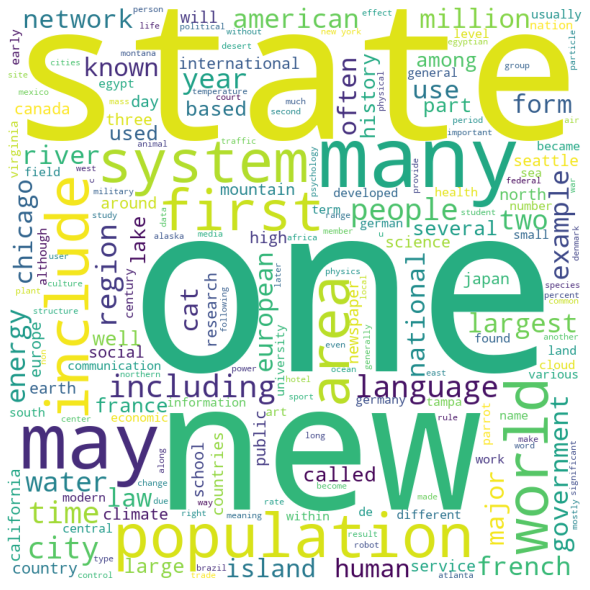

In [ ]:
#Wordclouds for specific user segments. Can be tweaked at will.

comment_words = ''
stopwords = set(STOPWORDS)

for val in interest_group['twitter post']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
df.isnull().sum() #checking for missing values

status          0
gender          0
email           0
age             0
messages        0
likes           0
retweets        0
name            0
twitter post    0
dtype: int64

In [ ]:
df.describe() #Exploring general informations and statistics of our dataset

,age,messages,likes,retweets
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.574760,2499.112600,2494.293900,2504.864340
std,20.196071,1443.248701,1440.661618,1445.464188
min,10.000000,0.000000,0.000000,0.000000
25%,27.000000,1240.000000,1246.000000,1257.000000
50%,45.000000,2505.000000,2494.000000,2507.000000
75%,62.000000,3757.000000,3731.000000,3756.000000
max,79.000000,4999.000000,4999.000000,4999.000000


In [ ]:
df['email'].value_counts() #should we drop it or not?

the@the.com          24
of@the.com           18
of@of.com            16
a@of.com             13
the@of.com           13
                     ..
of@appicl.net         1
the@entsgo.us         1
ofere@by.com          1
an.nal@trican.net     1
hased@Intat.net       1
Name: email, Length: 49331, dtype: int64

In [ ]:
df['gender'].describe() #exploring specific datapoints

count      50000
unique         2
top       female
freq       25088
Name: gender, dtype: object

In [ ]:
df.groupby('age')['twitter post'].describe() #exploring specific combinations of datapoints

,count,unique,top,freq
age,,,,
10,759,759,Removal and deposit material on bars and their...,1
11,659,659,"Media profiles marbles and 90 blue marbles, a ...",1
12,673,673,"El-Sisi. Sisi model. For example, the populati...",1
13,708,708,"Since 1909, Association, in 1973. Denmark held...",1
14,699,699,Of Suez and ordinary clerks or scriveners vari...,1
...,...,...,...,...
75,692,692,"Century, German processes at",1
76,719,719,"Rift zones, domains under Oyo control. The Alm...",1
77,711,711,York conducted The Journal of Onomastics. 58 (...,1


In [ ]:
df.index.value_counts(normalize = True) #checking for normality of distribution

eafe22bf-f436-49d2-8790-176aa156a690    0.00002
330df5f4-1df9-48ff-aecd-cd2c0031c893    0.00002
cea7d433-5c5a-4b6e-af05-21be042d1fff    0.00002
5f28a1c5-b465-41eb-bcd3-1991fc471d75    0.00002
37fbad6e-78df-434d-a351-bf27f9925a96    0.00002
                                         ...   
b392d9f0-4295-46b2-a713-cab8d7aa1e40    0.00002
6396824c-bfc2-4f6b-9b80-bfbc636ec1bf    0.00002
2c0ec3ec-0944-4dc6-a284-7c22cc6cab40    0.00002
9f2a814d-1fd7-4cbc-b77c-8887b04c8d58    0.00002
6a0169eb-996d-4736-8917-d55f3c40b81c    0.00002
Name: id, Length: 50000, dtype: float64

In [ ]:
#plotting multiple historgrams
fig = px.histogram(interest_group, x="age", color="gender", title ='Age distribution of Twitter userbase',
                template = "simple_white")

fig.update_traces(marker_line_color='rgb(12,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [ ]:
teenager = df[(df['age']<20) & (df['age']>12)]

In [ ]:
retirees = df[(df['age']<80) & (df['age']>65)].sort_values(by='age')

In [ ]:
fig = px.histogram(teenager, x="gender", y="likes", color="gender",
            title="Likes per gender, Teen (13-19) subgroup",
            width=600, height=400,
            color_discrete_map={ # replaces default color mapping by value
                "male": "lightblue", "female": "blue"
            },
            template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="likes", color="age", facet_col = 'gender', template='simple_white', title = 'Mean number of retweets across teenagers, by sex')
fig.show()